# " Deep learning classification of bugs "
> "A neural network to classify pictures of beetles, cockroaches, and dragonflies"

- toc: false
- branch: master
- badges: true
- comments: true
- categories: [fastpages, jupyter]
- image: images/some_folder/your_image.png
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2
- use_plotly: true

Deep learning has many applications including diagnosis prediction, facial recognition, and language processing.  In this blog post, a neural network will be trained to classify images of insects into three categories: beetle, cockroach, or dragonfly.  Input data in the form of pixel color values is fed into a network, passed through multiple layers with variable number of nodes, and output in the form of probabilities that the image belongs to each category.  Neural networks can have any number of layers with any number of nodes.  They can be sequential, layers move from one to the next in order, or they can be functional where information can skip layers and doesn't necessarily move around in order of each layer.  For this example, a sequential neural network will be used.

For more explanation about what neural networks are, check out this blog post from MIT: https://news.mit.edu/2017/explained-neural-networks-deep-learning-0414


In [1]:
#hide
import tensorflow as tf 

In [2]:
#hide
import matplotlib.pyplot as pld
import numpy as np
from tensorflow import keras
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [3]:
#hide
import os

## Load in Data

The keras preprocessing image package has the ImageDataGenerator, which is useful for loading images from multiple folders corresponding to their classification.  That command, combined with flow_from_directory, is used to create directory iterators that will be fed into the neural network.

In [4]:
train = ImageDataGenerator()
train_data = train.flow_from_directory('/home/jovyan/work/823homework/insects/train', target_size = (256,256), class_mode = "sparse")
type(train_data)

Found 1019 images belonging to 3 classes.


tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [5]:
trainiter = next(iter(train_data))
x_train = trainiter[0]
y_train = trainiter[1]

In [6]:
test = ImageDataGenerator()
test_data = test.flow_from_directory('/home/jovyan/work/823homework/insects/test', target_size = (256,256), class_mode = "sparse")

Found 180 images belonging to 3 classes.


## Build Model

In [14]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization

In [29]:
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(256,256,3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(BatchNormalization())
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(BatchNormalization())
model1.add(Dense(128, activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(3, activation='softmax'))      
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
model1.fit(train_data, epochs=3)

Epoch 1/3
32/32 [==============================] - 45s 1s/step - loss: 9.7370 - accuracy: 0.6349
Epoch 2/3
32/32 [==============================] - 45s 1s/step - loss: 0.6747 - accuracy: 0.8234
Epoch 3/3
32/32 [==============================] - 45s 1s/step - loss: 0.2948 - accuracy: 0.8891


In [59]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 127, 127, 32)      128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 62, 62, 64)        256       
_________________________________________________________________
dense_12 (Dense)             (None, 62, 62, 128)      

The model includes two convolution layers, and for the first one the input shape is the shape of the image pixel data for each image.  

After each convolution layer, there are max pooling layers.  These take spatial data and returns the maximum pooled values of the rows and columns.

The two batch normalization layers transforms the data fed into the layer and normalizes the data to mean 0 and standard deviation approximately equal to 1.  

Dense layers are the standard neural network layers.  

Flatten layers flatten the input, reducing the dimensionality.  

Finally, the dropout layer helps to prevent over fitting by randomly setting input values to 0 at a specified rate (0.5).  

In [60]:
#hide
model1.save("./hw5-model.model")

INFO:tensorflow:Assets written to: ./hw5-model.model/assets


In [61]:
#hide
TRAIN=False
if TRAIN:
    model1 = build_model(3)
    model1.fit(train_data, epochs=3)
    model1.save("./hw5-model.model")
else:
    model1 = tf.keras.models.load_model('hw5-model.model')

## Test Model

In [42]:
testiter = next(iter(test_data))
x_test = testiter[0]
y_test = testiter[1]

In [43]:
model1.evaluate(x_test, y_test)

1/1 [==============================] - 0s 2ms/step - loss: 0.7068 - accuracy: 0.7500


[0.7067947387695312, 0.75]

This model predicts the insect type in our test dataset with 75% accuracy.

In [48]:
model1.predict(x_test)

array([[2.8543890e-02, 2.0540468e-01, 7.6605141e-01],
       [4.7377609e-02, 5.2007479e-03, 9.4742167e-01],
       [2.4602392e-03, 4.6063507e-01, 5.3690469e-01],
       [6.1241001e-01, 3.8737842e-01, 2.1154605e-04],
       [2.8890421e-04, 1.5930974e-01, 8.4040135e-01],
       [1.0237539e-02, 3.6681926e-01, 6.2294322e-01],
       [2.6782918e-01, 7.3208630e-01, 8.4464795e-05],
       [9.0810400e-01, 9.1820136e-02, 7.5904012e-05],
       [4.0984207e-05, 9.9846649e-01, 1.4926413e-03],
       [1.0635249e-06, 9.9798954e-01, 2.0093634e-03],
       [1.2908337e-05, 9.9169183e-01, 8.2953032e-03],
       [1.1721704e-01, 3.1640597e-02, 8.5114235e-01],
       [2.4109933e-04, 9.9943727e-01, 3.2152818e-04],
       [2.7082202e-01, 7.2889942e-01, 2.7854912e-04],
       [1.6830804e-02, 3.1359952e-02, 9.5180923e-01],
       [1.3457993e-05, 9.9590498e-01, 4.0816795e-03],
       [1.1310271e-01, 2.2023624e-02, 8.6487359e-01],
       [8.4571220e-06, 9.8079890e-01, 1.9192755e-02],
       [1.6154924e-02, 4.587

In [45]:
y_test

array([2., 0., 2., 0., 2., 2., 0., 0., 1., 1., 1., 0., 1., 0., 2., 1., 2.,
       1., 1., 0., 1., 2., 1., 2., 1., 1., 0., 0., 0., 1., 1., 2.],
      dtype=float32)

The array with three columns hold the predicted probabilities of the test image being in the category corresponding to that column number.  For example, the first image, in the first row, has the largest predicted probability in the third column (corresponding to category 2, dragonfly).  Looking at the test category data, we can see that that was correct and the image does belong to category 2.  

## Interpret using SHAP

SHAP is a package used for explainable AI.  It can be used to explain a range of models from linear regression to neural networks.  A tutorial on a similar image classification can be found here: https://shap.readthedocs.io/en/latest/example_notebooks/image_examples/image_classification/Multi-input%20Gradient%20Explainer%20MNIST%20Example.html

The insect images are a lot more complex than the digit images used in the above tutorial (MNIST dataset).  Because of this, the model used has more layers than this tutorial and also is less accurate.  With the low accuracy in this model, the shap values, while explaining how the model decides insect type, will not truly explain what makes each image a beetle, cockroach, or dragonfly.  

In [49]:
import shap

In [50]:
shap.initjs()

In [51]:
explainer1 = shap.GradientExplainer(model1, x_train)

In [52]:
x_train[:1].shape

(1, 256, 256, 3)

In [53]:
sv = explainer1.shap_values(x_train[:5])

In [55]:
#hide
#namesnums = {0:"beetle", 1:"cockroach", 2:"dragonfly"}
#lab = [namesnums[i] for i in nums]

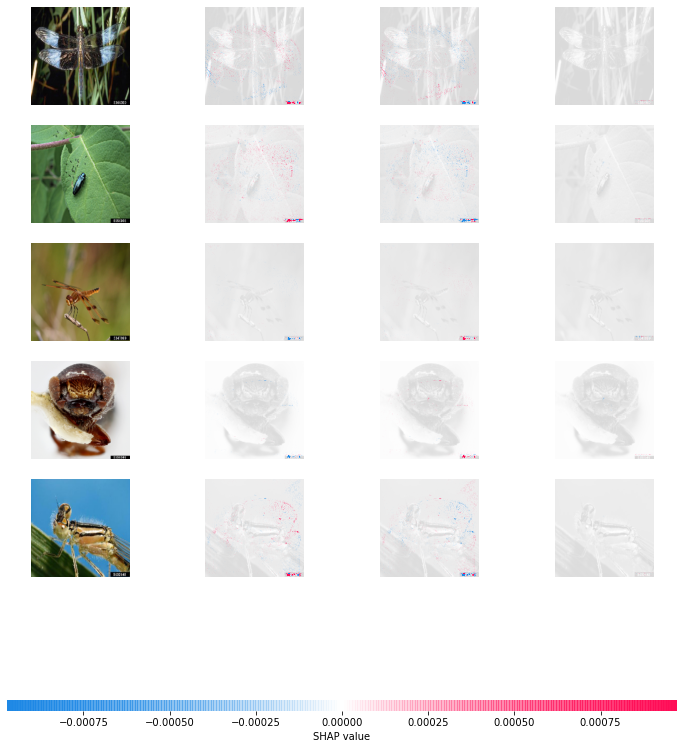

In [56]:
shap.image_plot(shap_values = [sv[i] for i in range(3)], 
                pixel_values = x_test[:5])

The first column contains the actual image.  Second column contains the faded image with SHAP values corresponding to the beetle category.  Third column corresponds to cockroach.  Fourth column corresponds to dragonfly.

Negative SHAP values, depicted with blue highlight in the above image, mean the pixel has a negative impact on prediction, meaning the image is likely not part of the category being checked.  Positive SHAP values, depicted with red highlight in the above image, mean the pixel has a positive impact on prediction, meaning that part of the image appears to fit the category checked.  

The shap values shown in the figure above suggest that the model actually relied most heavily on the bottom right corner of the images to classify the insects.  Upon further inspection, it can be seen that every image has a label with letters and numbers or just number in that corner.  The neural network picked up on those numbers and realized that was the easiest way to distinguish between groups.  Had those labels been cropped out of the images, this figure would look completely different.  

This is a great example of how machine learning algorithms can pick up on unexpected details that otherwise wouldn't have been noticed by the researcher.  In this case, it ended up addressing something that may not be relevant to the question of how to classify insects.  However, it did find a solution relevant to the given images.